In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"abdelhakbenbassou","key":"4bcb9007fc2276698a703a539132ab15"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 5.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=62c15340b2e622fcc7b1a9336ecaa3b878bdc2b09948dcdaffe3878c23223274
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c spooky-author-identification

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 75.4MB/s]


In [ ]:
!unzip spooky-author-identification.zip

Archive:  spooky-author-identification.zip
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               


In [ ]:

!unzip test.zip
!unzip train.zip

Archive:  test.zip
  inflating: test.csv                
Archive:  train.zip
  inflating: train.csv               


In [ ]:
import pandas as pd


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


In [ ]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [ ]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [ ]:
train.shape

(19579, 3)

In [ ]:
train.tail()

,id,text,author
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP
19578,id00393,"He laid a gnarled claw on my shoulder, and it ...",HPL


In [ ]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
# Nombre d'auteurs
train.author.unique()

array(['EAP', 'HPL', 'MWS'], dtype=object)

In [ ]:
#frequence 

train['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [ ]:
import plotly.graph_objects as go
authors=['EAP', 'MWS', 'HPL']

fig = go.Figure([go.Bar(x=authors, y=train['author'].value_counts())])
fig.show(renderer="colab")

In [ ]:
# word frequencies
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.collocations import *


words = []
for i in train['text']:
  words.append(i)

len(words)

19579

In [ ]:
words[0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [29]:
train['text'].dropna(inplace=True)
import nltk
nltk.download('punkt')
tokens = train['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
tokens

0        [This, process, ,, however, ,, afforded, me, n...
1        [It, never, once, occurred, to, me, that, the,...
2        [In, his, left, hand, was, a, gold, snuff, box...
3        [How, lovely, is, spring, As, we, looked, from...
4        [Finding, nothing, else, ,, not, even, gold, ,...
                               ...                        
19574    [I, could, have, fancied, ,, while, I, looked,...
19575    [The, lids, clenched, themselves, together, as...
19576    [Mais, il, faut, agir, that, is, to, say, ,, a...
19577    [For, an, item, of, news, like, this, ,, it, s...
19578    [He, laid, a, gnarled, claw, on, my, shoulder,...
Name: text, Length: 19579, dtype: object

In [31]:
train['tokens']=tokens

In [32]:
train.text.str.split(expand=True).stack().value_counts()


the             33296
of              20851
and             17059
to              12615
I               10382
                ...  
kinsman             1
institution.        1
"und                1
specie.             1
medicine;           1
Length: 47556, dtype: int64

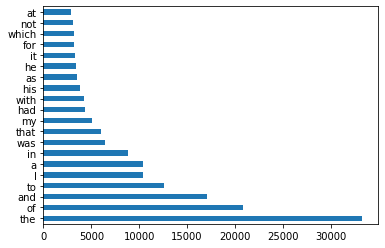

In [33]:
train.text.str.split(expand=True).stack().value_counts()[:20].plot(kind = 'barh')

In [34]:
# On voit très bien qu'il n'ya pas de preprocessing, pas d'information !!!

In [35]:
# Zoom sur chaque author
from wordcloud import WordCloud, STOPWORDS

eap = train[train.author=="EAP"]["text"].values
mws = train[train.author=="MWS"]["text"].values
hpl = train[train.author=="HPL"]["text"].values

In [36]:
text_eap = ' '
for i in eap:
  text_eap = text_eap + ' ' + i

text_mws = ' '
for i in mws:
  text_mws = text_mws + ' ' + i


text_hpl = ' '
for i in hpl:
  text_hpl = text_hpl + ' ' + i


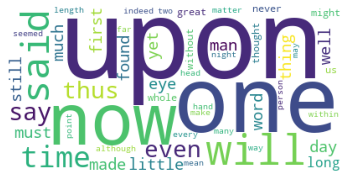

In [37]:
wordcloud = WordCloud(background_color = 'white', stopwords = STOPWORDS, max_words = 50).generate(text_eap)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

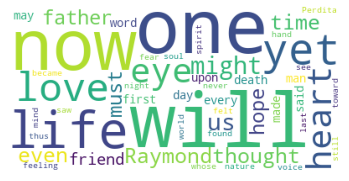

In [38]:
wordcloud = WordCloud(background_color = 'white', stopwords = STOPWORDS, max_words = 50).generate(text_mws)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

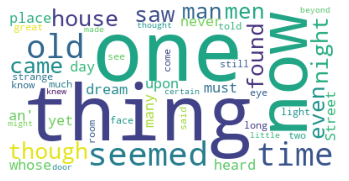

In [39]:
wordcloud = WordCloud(background_color = 'white', stopwords = STOPWORDS, max_words = 50).generate(text_hpl)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [40]:
# Commencer le preprocessing

#lower

train["tokens"].head() 

0    [This, process, ,, however, ,, afforded, me, n...
1    [It, never, once, occurred, to, me, that, the,...
2    [In, his, left, hand, was, a, gold, snuff, box...
3    [How, lovely, is, spring, As, we, looked, from...
4    [Finding, nothing, else, ,, not, even, gold, ,...
Name: tokens, dtype: object

In [41]:
train['text'] = train['text'].str.lower()

In [42]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
train['text_without_stopwords'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [44]:
train['text_without_stopwords'].head()

0    process, however, afforded means ascertaining ...
1          never occurred fumbling might mere mistake.
2    left hand gold snuff box, which, capered hill,...
3    lovely spring looked windsor terrace sixteen f...
4    finding nothing else, even gold, superintenden...
Name: text_without_stopwords, dtype: object

In [45]:
#remove punctuation
train["text_without_stopwords"] = train["text_without_stopwords"].str.replace('[^\w\s]','')
train["text_without_stopwords"].head()

0    process however afforded means ascertaining di...
1           never occurred fumbling might mere mistake
2    left hand gold snuff box which capered hill cu...
3    lovely spring looked windsor terrace sixteen f...
4    finding nothing else even gold superintendent ...
Name: text_without_stopwords, dtype: object

In [46]:
#tokenization
from nltk import word_tokenize
tokens = train['text_without_stopwords'].apply(word_tokenize)
train["text_ok_tokenized"] = tokens

In [47]:
train["text_ok_tokenized"].head()

0    [process, however, afforded, means, ascertaini...
1    [never, occurred, fumbling, might, mere, mistake]
2    [left, hand, gold, snuff, box, which, capered,...
3    [lovely, spring, looked, windsor, terrace, six...
4    [finding, nothing, else, even, gold, superinte...
Name: text_ok_tokenized, dtype: object

In [48]:
#Stemming 

stemmer = nltk.stem.PorterStemmer()

train['stemmed'] = train['text_ok_tokenized'].apply(lambda x: [stemmer.stem(y) for y in x]) 

In [49]:
# Lemmatization 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemm = WordNetLemmatizer()
train['lemmetized'] = train['text_ok_tokenized'].apply(lambda x: [lemm.lemmatize(y) for y in x]) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [50]:
# Train lemmetized est ok pour la suite

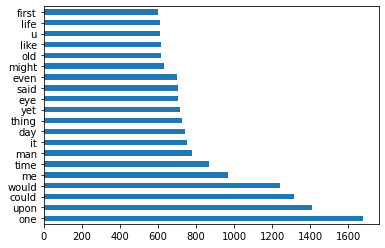

In [51]:
train["lemmetized"].apply(lambda x: pd.Series(x)).stack().value_counts()[:20].plot(kind = 'barh')

In [52]:
#word cloud pour chaque authot


#todo 




In [53]:
train.text.head()

0    this process, however, afforded me no means of...
1    it never once occurred to me that the fumbling...
2    in his left hand was a gold snuff box, from wh...
3    how lovely is spring as we looked from windsor...
4    finding nothing else, not even gold, the super...
Name: text, dtype: object

In [54]:
train.lemmetized.head()

0    [process, however, afforded, mean, ascertainin...
1    [never, occurred, fumbling, might, mere, mistake]
2    [left, hand, gold, snuff, box, which, capered,...
3    [lovely, spring, looked, windsor, terrace, six...
4    [finding, nothing, else, even, gold, superinte...
Name: lemmetized, dtype: object

In [55]:
train.lemmetized.shape

(19579,)

In [56]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [57]:
flatten = flatten(train.lemmetized)

In [58]:
vectorizer = CountVectorizer(min_df=0)
sentence_transform = vectorizer.fit_transform(flatten)

In [59]:
vectorizer.get_feature_names()

['aaem',
 'ab',
 'aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abaout',
 'abased',
 'abasement',
 'abashed',
 'abashment',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbey',
 'abbreviation',
 'abbé',
 'abdicated',
 'abdication',
 'abdomen',
 'abdul',
 'abernethy',
 'aberrancy',
 'aberrant',
 'aberration',
 'abeyance',
 'abhor',
 'abhorred',
 'abhorrence',
 'abhorrent',
 'abide',
 'abigail',
 'abijah',
 'ability',
 'abject',
 'abjure',
 'ablaze',
 'able',
 'ably',
 'abnormal',
 'abnormality',
 'abnormally',
 'aboard',
 'abode',
 'abolished',
 'abominable',
 'abomination',
 'aboriginal',
 'abortion',
 'abortive',
 'abounded',
 'aboundingly',
 'abounds',
 'about',
 'above',
 'abra',
 'abreast',
 'abroad',
 'abrupt',
 'abruptly',
 'abruptness',
 'absconded',
 'absence',
 'absense',
 'absent',
 'absolute',
 'absolutely',
 'absolved',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbingly',
 'absorption',
 'abstain',
 'abstained',
 'abstaining',
 'abstemiou

In [81]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [82]:
lda.fit(sentence_transform)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=11, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [83]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [84]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:one upon would said thought saw far hour became another air find power an sound home feel mountain the large return others degree month toward appearance land subject purpose filled neither event followed distance formed grave grief top round loved

Topic #1:thing like little heart whole body beyond end matter name something think open dead deep lost can manner present ancient wa change ground shadow country west sleep companion together call reached youth latter fancy action opened plan existence girl study

Topic #2:could say world dream within moment that among mr knew took wall told certain began town brought character sight give which true set question attention possible believe happiness remained next four already evening affection sky himself fellow number cause england

Topic #3:time made still him house word know come you felt head sea good strange raymond although street appeared high fact turned de step second perdita quite looking state wond

In [85]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

In [86]:
doc_topic = lda.transform(sentence_transform)

In [87]:
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n".format(n,topic_most_pr))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
doc: 264596 topic: 7

doc: 264597 topic: 7

doc: 264598 topic: 4

doc: 264599 topic: 7

doc: 264600 topic: 4

doc: 264601 topic: 10

doc: 264602 topic: 3

doc: 264603 topic: 10

doc: 264604 topic: 1

doc: 264605 topic: 7

doc: 264606 topic: 9

doc: 264607 topic: 10

doc: 264608 topic: 10

doc: 264609 topic: 3

doc: 264610 topic: 0

doc: 264611 topic: 2

doc: 264612 topic: 3

doc: 264613 topic: 10

doc: 264614 topic: 0

doc: 264615 topic: 4

doc: 264616 topic: 9

doc: 264617 topic: 2

doc: 264618 topic: 2

doc: 264619 topic: 5

doc: 264620 topic: 1

doc: 264621 topic: 0

doc: 264622 topic: 7

doc: 264623 topic: 7

doc: 264624 topic: 7

doc: 264625 topic: 6

doc: 264626 topic: 1

doc: 264627 topic: 8

doc: 264628 topic: 9

doc: 264629 topic: 4

doc: 264630 topic: 0

doc: 264631 topic: 5

doc: 264632 topic: 10

doc: 264633 topic: 9

doc: 264634 topic: 4

doc: 264635 topic: 5

doc: 264636 topic: 10

doc: 264637 t

In [67]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

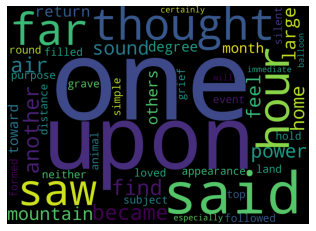

In [68]:
# Generating the wordcloud with the values under the category dataframe
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

In [88]:
#https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial/notebook